In [1]:
fpath="S:/upx-coding/"


In [2]:
#import tsv
import pandas as pd
import numpy as np
fb = pd.read_table(fpath+'pseudo_facebook.tsv')
fb.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [3]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


### Dealing with Missing Values

**gender**                   98828 non-null object

**tenure**                   99001 non-null float64


In [4]:
fb[fb['tenure'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [5]:
fb[(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')].head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
34748,1818602,101,11,1912,12,female,824.0,48,30,1,1,1,1,0,0
34819,2097493,103,1,1910,1,female,594.0,49,7,2,6,2,6,0,0
35031,1915219,99,8,1914,9,female,24.0,49,30,15,19,1,15,14,4
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
35329,1377781,100,28,1913,8,female,555.0,48,8,128,130,128,103,0,27
35389,1135014,102,15,1911,10,female,2261.0,49,14,250,160,112,41,138,119
35665,1502001,95,9,1918,9,female,412.0,51,9,0,0,0,0,0,0
35666,2152739,97,9,1916,6,female,370.0,51,43,0,0,0,0,0,0
35687,1097938,90,2,1923,11,female,359.0,50,34,1,1,0,0,1,1
35799,1048048,100,23,1913,8,female,784.0,51,28,2,24,2,22,0,2


Here now we can replace tenure value with mean of above sample of dataframes with following condition:

age is between(88,103)

frined_count is between(48,137)

gender = female

In [6]:
fb['tenure'][(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')].mean()

1024.5056603773585

In [7]:
fb['tenure'].fillna(fb['tenure'][(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')].mean(),inplace=True)

In [8]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [9]:
fb.max()

userid                   2193542.0
age                          113.0
dob_day                       31.0
dob_year                    2000.0
dob_month                     12.0
tenure                      3139.0
friend_count                4923.0
friendships_initiated       4144.0
likes                      25111.0
likes_received            261197.0
mobile_likes               25111.0
mobile_likes_received     138561.0
www_likes                  14865.0
www_likes_received        129953.0
dtype: float64

**Hypothesis #(1) :** There exist outlier in age

In original data: max(age) is 113

In [10]:
# Computing IQR
Q1 = fb['age'].quantile(0.25)
Q3 = fb['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = fb.query('(@Q1 - 1.5 * @IQR) <= age <= (@Q3 + 1.5 * @IQR)')
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.6+ MB


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

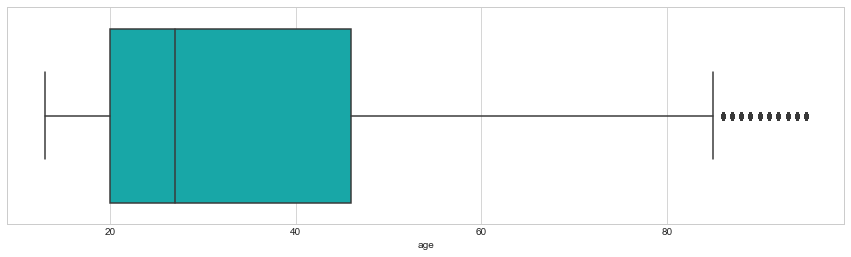

In [12]:
# Visualisation of Outlier
fig = plt.figure(figsize=(15,4))
sns.set_style("whitegrid")
sns.boxplot(x='age', data=filtered, color='c')
plt.show()

In [13]:
filtered.max()

userid                   2193542.0
age                           95.0
dob_day                       31.0
dob_year                    2000.0
dob_month                     12.0
tenure                      2697.0
friend_count                4917.0
friendships_initiated       4144.0
likes                      25111.0
likes_received            261197.0
mobile_likes               25111.0
mobile_likes_received     138561.0
www_likes                  14865.0
www_likes_received        129953.0
dtype: float64

**NOTE:** Hypothes #(1) is proved **true** as max(age) is 95 after finding outliers

In [14]:
temp_df=filtered[filtered['gender'].isnull()]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 3224 to 97530
Data columns (total 15 columns):
userid                   120 non-null int64
age                      120 non-null int64
dob_day                  120 non-null int64
dob_year                 120 non-null int64
dob_month                120 non-null int64
gender                   0 non-null object
tenure                   120 non-null float64
friend_count             120 non-null int64
friendships_initiated    120 non-null int64
likes                    120 non-null int64
likes_received           120 non-null int64
mobile_likes             120 non-null int64
mobile_likes_received    120 non-null int64
www_likes                120 non-null int64
www_likes_received       120 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 15.0+ KB


There are 120 person with no gender details so their gender could be replaced with mode(gender) but mean(age) i.e. having similar age.  

In [15]:
minAge=temp_df.age.min()
maxAge=temp_df.age.max()
minFc=temp_df.friend_count.min()
maxFc=temp_df.friend_count.max()
print(minAge,maxAge,minFc,maxFc)

15 95 1 1609


In [16]:
filtered['gender'][(filtered.age >=15) & (filtered.age <=95) & (filtered.friend_count <=1609)].mode()

0    male
dtype: object

**Analysis:** Acoording above analysis we could replace missing gender data with **male**

In [17]:
filtered['gender'].fillna(filtered['gender'].mode())
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 14.1+ MB


# Date of Birth Analysis

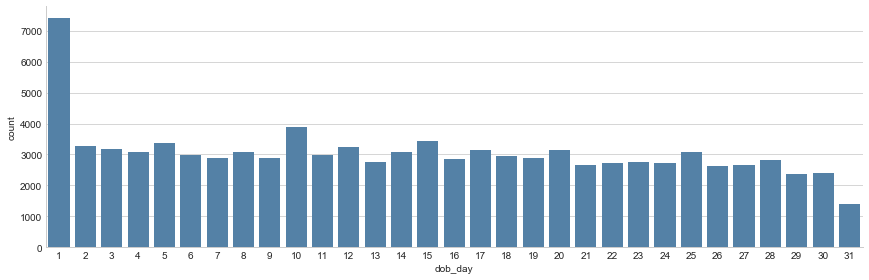

In [18]:
sns.factorplot("dob_day", data=filtered, aspect=3,kind="count", color='steelblue')


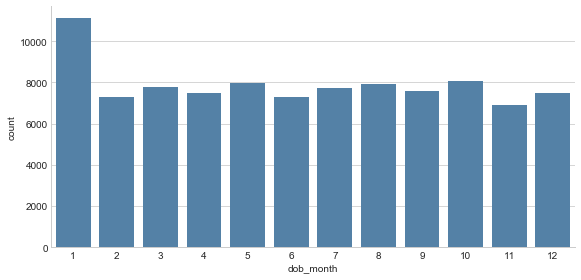

In [19]:
sns.factorplot("dob_month", data=filtered, aspect=2,kind="count", color='steelblue')

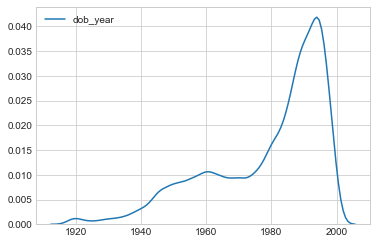

In [20]:
sns.kdeplot(filtered['dob_year'])

In [21]:
#dob= fb.iloc[:,[2,4,3]]
DOB=pd.to_datetime((filtered.dob_year*10000+filtered.dob_month*100+filtered.dob_day).apply(str),format='%Y%m%d')
DOB = pd.DataFrame({'dob':DOB.values})
DOB.head(10)

,dob
0,1999-11-19
1,1999-11-02
2,1999-11-16
3,1999-12-25
4,1999-12-04
5,1999-12-01
6,2000-01-14
7,2000-01-04
8,2000-01-01
9,2000-02-02


In [151]:
dob_count=DOB.dob.value_counts()
dob_count=pd.DataFrame(dob_count)
dob_count.head(5)

,dob
1988-01-01,656
1987-01-01,393
1990-01-01,313
1995-01-01,168
1980-01-01,164


In [23]:
dob_count.dob.value_counts()

1      4837
2      4080
3      3027
4      2358
5      1611
6      1208
7       925
8       713
9       577
10      466
11      357
12      275
13      215
14      196
15      146
16       98
17       67
18       54
20       35
19       34
24       18
21       17
23       17
22       12
25        8
27        6
28        6
29        4
30        4
39        3
34        3
32        2
67        2
48        1
96        1
112       1
656       1
51        1
45        1
33        1
65        1
66        1
59        1
72        1
120       1
83        1
138       1
42        1
36        1
52        1
164       1
26        1
393       1
53        1
149       1
313       1
31        1
118       1
168       1
47        1
Name: dob, dtype: int64

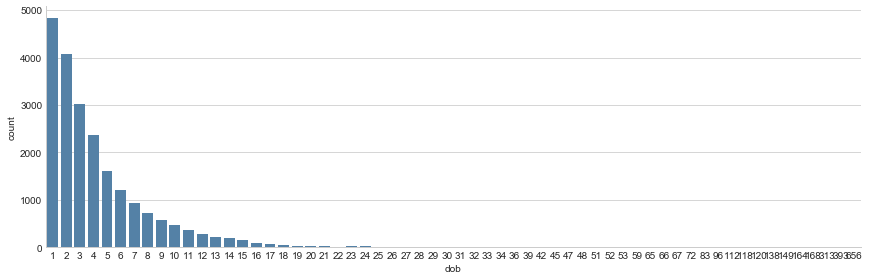

In [24]:
sns.factorplot("dob", data=dob_count, aspect=3, kind="count", color='steelblue')

**Analysis of above graph:** There are 4837 persons having unique DOB and are more in numbers. Also there are 656 person having same DOB


# Friend count analysis

In [25]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 14.1+ MB


### (1)  Gender wise friends count 

In [86]:
#Checking sum(gender ) == total persons
m=filtered.gender.value_counts()['male']
f=filtered.gender.value_counts()['female']
print('Male = ',m,'\n')
print('Male = ',f,'\n')
print('Total= ',filtered.count()['gender'],'\n')
filtered.count()['gender']==m+f
#fb.word.value_counts()['gender']

Male =  56011 

Male =  38558 

Total=  94569 



True

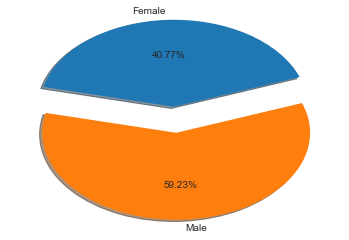

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'Female', 'Male'
sizes = [f,m]
explode = (0.1, 0.2)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=20)

plt.show()

**Hypothesis #(2):** Male should have more friends.


Now the data should be distrubuted according to **age groups**:
    
group     age    

1         child (0–15)

2         teenager (16-19)

3         young-adult (20–30)

4         adult(31–50)

5         senior-adult (51-64) 

6         old (>64)

In [28]:
# Adding new column "age_group" according to above classification
age_group=[]
for age in filtered['age']:
    if age > 64:
        age_group.append('old')
    elif age>50:
        age_group.append('senior-adult')
    elif age>30:
        age_group.append('adult')
    elif age>19:
        age_group.append('young-adult')
    elif age>15:
        age_group.append('teenager')
    else:
        age_group.append('child')

In [29]:
filtered['age_group'] = age_group
filtered.info()
# for droping the column use: 
#filtered = filtered.drop('age_group', 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 16 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
age_group                94689 non-null object
dtypes: float64(1), int64(13), object(2)
memory usage: 14.8+ MB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
filtered['age'].max()
#filtered.iloc[:,[1,15]]

95

In [31]:
age_count=filtered.age_group.value_counts()
age_count=pd.DataFrame(age_count)
age_count

,age_group
young-adult,32415
adult,21459
teenager,15956
senior-adult,12503
old,7329
child,5027


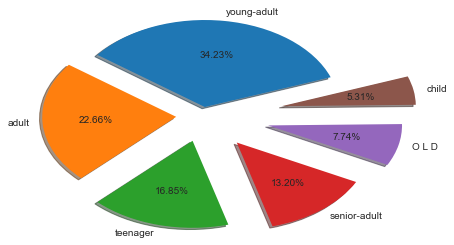

In [32]:
labels = 'young-adult','adult','teenager','senior-adult','O L D','child'

sizes = filtered.age_group.value_counts()
explode = (0.1, 0.2,0.3,0.4,0.5,0.6)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=20)

plt.show()

In [33]:
filtered.age_group.value_counts()

young-adult     32415
adult           21459
teenager        15956
senior-adult    12503
old              7329
child            5027
Name: age_group, dtype: int64

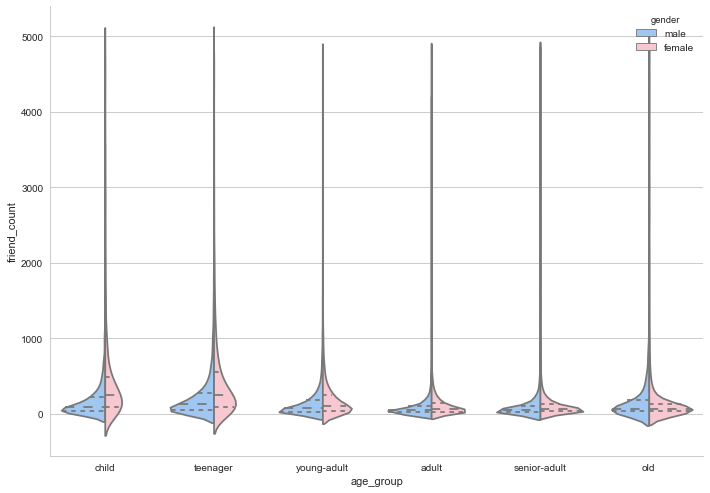

In [52]:
import numpy as np

#For spacious graph plot
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# plot
sns.set(style="whitegrid", palette="pastel", color_codes=True)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="age_group", y="friend_count", hue="gender", data=filtered, split=True,
               inner="quart", palette={"male": "b", "female": "pink"}, ax=ax)
sns.despine()
fig.savefig('example.png')

**ANALYSIS:** 

- This means FEMALEs have more number of friend in different age_group excep OLD aged persons.

- Teenagers have more number of friends

- We can visualize it also with classical bar plot given below.

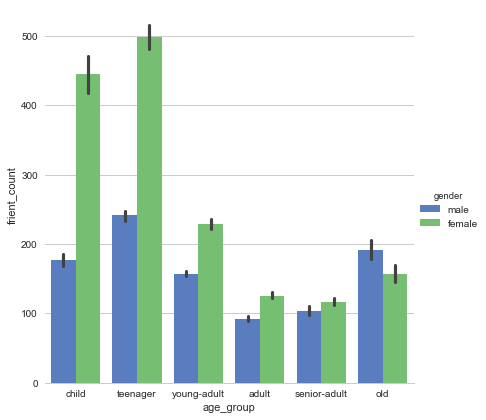

In [81]:
sns.set(style="whitegrid")

# Draw a nested barplot to show friend_count for age_group and gender
g = sns.factorplot(x="age_group", y="friend_count", hue="gender", data=filtered,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("frient_count")

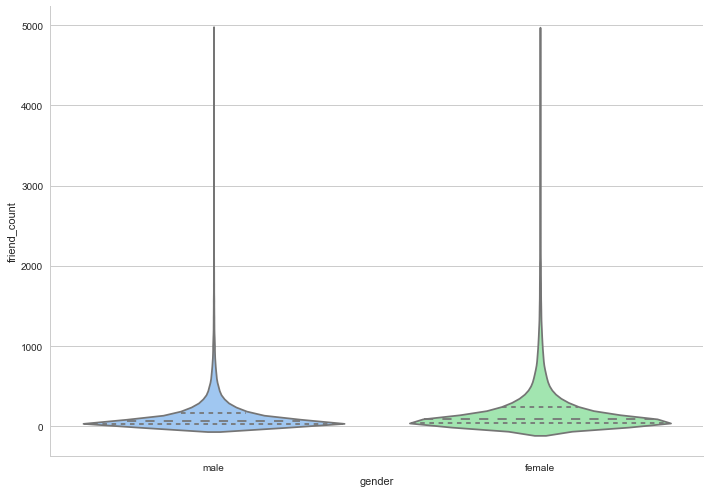

In [71]:
#For spacious graph plot
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# plot
sns.set(style="whitegrid", palette="pastel", color_codes=True)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

# Draw a nested violinplot and split the violins for easier comparison

sns.violinplot(x="gender", y="friend_count", data=filtered, split=True, scale='width',
               inner="quart", ax=ax)

#sns.violinplot(x="gender", y="friend_count", hue="age_group", data=filtered, split=True,
#               inner="quart", palette={"male": "b", "female": "pink"}, ax=ax)

sns.despine()
fig.savefig('example1.png')

**ANALYSIS:**

- This means FEMALEs have more number of friend in general. 

- We can visualize it also with classical bar plot given below.

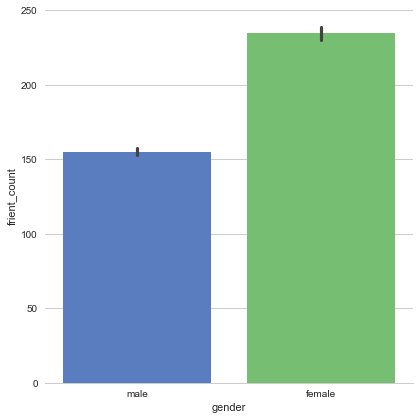

In [80]:
sns.set(style="whitegrid")

# Draw a nested barplot to show friend_count for age_group and gender
g = sns.factorplot(x="gender", y="friend_count", data=filtered,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("frient_count")

### (2) Age wise friends count

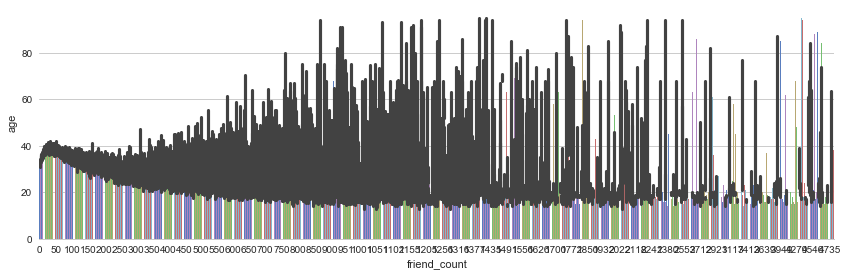

In [143]:
sns.set(style="whitegrid")

# Draw a nested barplot to show friend_count for age_group and gender
g = sns.factorplot(x="friend_count", y="age", data=filtered,
                   size=4, kind="bar", palette="muted", aspect=3)
g.despine(left=True)
g.set_ylabels("age")
g.set_xticklabels(step=50)

**NOTE:** Hypothesis #(2) is proved **False**

- Though number of males are more but Females have more number of friends.

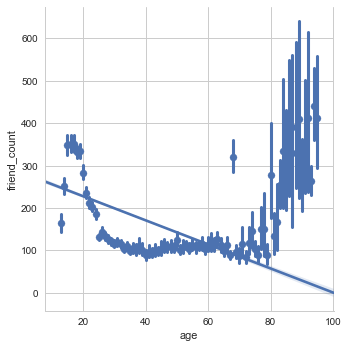

In [144]:
sns.lmplot(x="age", y="friend_count", data=filtered, x_estimator=np.mean)

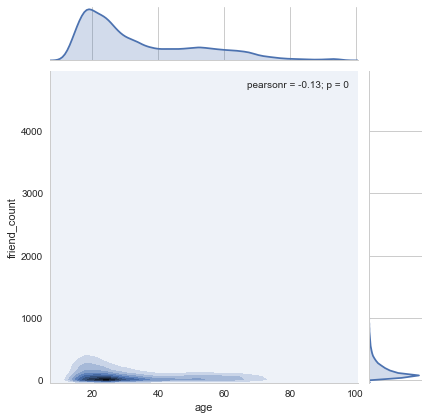

In [82]:
sns.jointplot(x="age", y="friend_count", data=filtered, kind="kde")

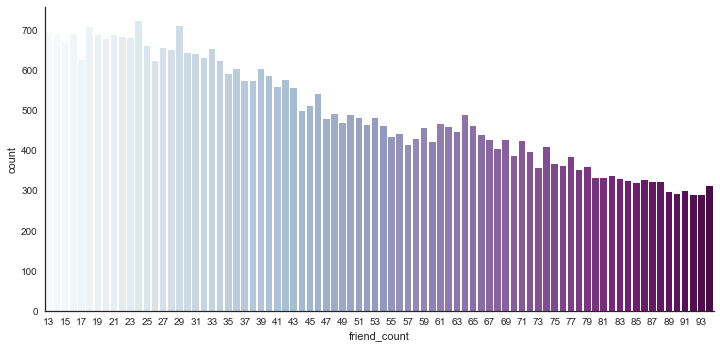

In [108]:
sns.set(style="white")
years = np.arange(filtered['age'].min(), filtered['age'].max())
# Draw a count plot to show the number of friends with age
g = sns.factorplot(x="friend_count", data=filtered, kind="count",
                   palette="BuPu", size=5, aspect=2, order=years)
g.set_xticklabels(step=2)

**Analysis:** 
- Person havin age 24 years have maximum number of Friends

**Hypothesis #(3):** Gender of persons having more number of friends is **female**

In [117]:
# Lets split the dataframe with age==24 
temp_df=filtered.loc[filtered['age']==24]
  
temp_df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
445,1487491,24,5,1989,11,male,513.0,0,0,0,0,0,0,0,0,young-adult
446,1635754,24,18,1989,11,male,350.0,0,0,0,0,0,0,0,0,young-adult
447,2022509,24,25,1989,11,female,197.0,0,0,0,0,0,0,0,0,young-adult
448,1843594,24,28,1989,11,male,9.0,0,0,0,0,0,0,0,0,young-adult
449,1439827,24,26,1989,12,male,764.0,0,0,0,0,0,0,0,0,young-adult


In [123]:
# Now lets slice 'gender','friend_count' from above DataFrame
age24_df=temp_df.iloc[:,[5,7]]
  
age24_df.head(5)

,gender,friend_count
445,male,0
446,male,0
447,female,0
448,male,0
449,male,0


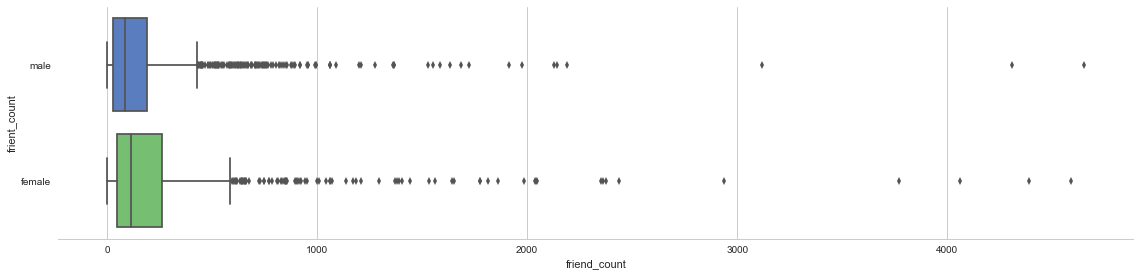

In [140]:
sns.set(style="whitegrid")

# Draw a nested barplot to show friend_count for age_group and gender
g = sns.factorplot(x="friend_count", y="gender", data=age24_df,
                   size=4, kind="box", palette="muted",aspect=4)
g.despine(left=True)
g.set_ylabels("frient_count")

**Analysis:** Hypothesis #(3) is proved **True** i.e. Gender of persons having more number of friends is female

# Tenure analysis

In [145]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 16 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
age_group                94689 non-null object
dtypes: float64(1), int64(13), object(2)
memory usage: 14.8+ MB


In [152]:
tenure_count=filtered.tenure.value_counts()
tenure_count=pd.DataFrame(tenure_count)
tenure_count.head(5)

,tenure
300.0,172
303.0,167
242.0,161
272.0,160
257.0,159


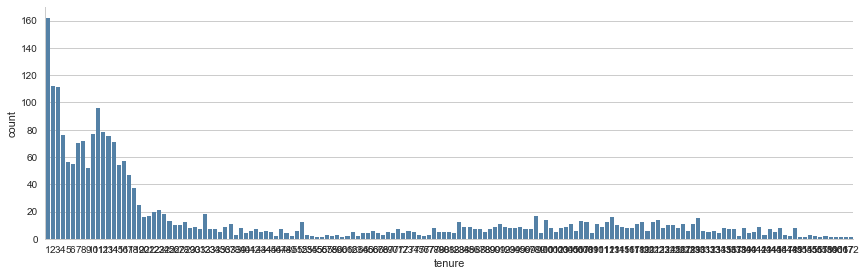

In [153]:
sns.factorplot("tenure", data=tenure_count, aspect=3, kind="count", color='steelblue')
g.set_xticklabels(step=50)

**Analysis:** Max tenure of any person in given data is 172

# Fb Like analysis

In [154]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 16 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
age_group                94689 non-null object
dtypes: float64(1), int64(13), object(2)
memory usage: 14.8+ MB


In [155]:
likes_count=filtered.likes.value_counts()
likes_count=pd.DataFrame(likes_count)
likes_count.head(5)

,likes
0,21895
1,6706
2,4271
3,3121
4,2396


In [158]:
likes_count.likes.mode()

0    1
dtype: int64

**Analysis:** Max like count of any person in given data is 21895.

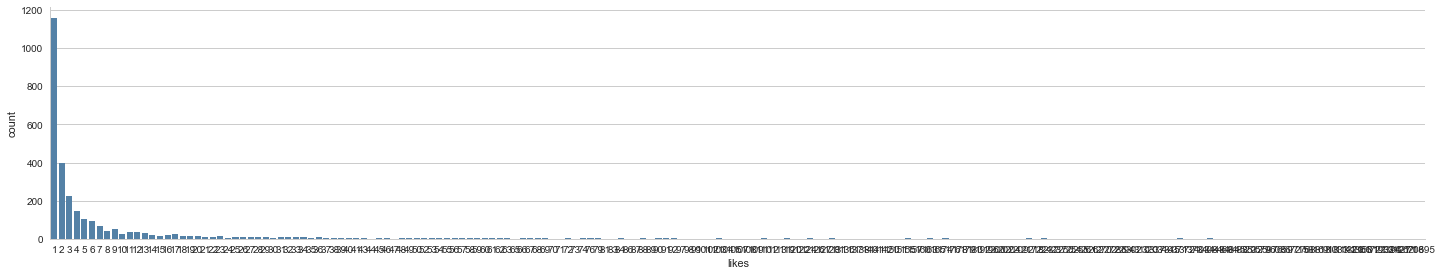

In [157]:
sns.factorplot("likes", data=likes_count, aspect=5, kind="count", color='steelblue')
g.set_xticklabels(step=50)